# HPS Survey Data
**HPS (Household Pulse Survey)** is a 20-minute rapid national online survey conducted by the U.S. Census Bureau, in partnership with several other federal agencies, to measure how emergent issues are impacting U.S. households from a social and economic perspective in a near real-time fashion. More information about the survey can be found [here](https://www.census.gov/programs-surveys/household-pulse-survey.html).

Although the oldest publish data is from 2020, the survey questions about housing in the first half of 2020 is different from the rest, so we will exclude the year 2020 from our analysis.

In this notebook, we will:
- clean and preprocess the dataset
- perform exploratory nalysis on the initial data
- derive insights on housing situation in Massachusetts over the year 2021 to 2023

This analysis will be used to compare District 7's housing conditions with Massachusetts as a whole.

Import required library:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

Consolidate data from the same year and download into the same dataframe:

In [2]:
file_pattern_2021 = os.path.join('../data/household-pulse-surveys', '**', 'pulse2021_puf*.csv')
file_pattern_2022 = os.path.join('../data/household-pulse-surveys', '**', 'pulse2022_puf*.csv')
file_pattern_2023 = os.path.join('../data/household-pulse-surveys', '**', 'pulse2023_puf*.csv')
csv_files_2021 = glob.glob(file_pattern_2021, recursive=True)
csv_files_2022 = glob.glob(file_pattern_2022, recursive=True)
csv_files_2023 = glob.glob(file_pattern_2023, recursive=True)

In [36]:
df_list_2021 = []
df_list_2022 = []
df_list_2023 = []

for file in csv_files_2021:
    df = pd.read_csv(file, index_col=False)
    df_list_2021.append(df)

for file in csv_files_2022:
    df = pd.read_csv(file, index_col=False)
    df_list_2022.append(df)

for file in csv_files_2023:
    df = pd.read_csv(file, index_col=False)
    df_list_2023.append(df)

In [37]:
HPS_2021_df = pd.concat(df_list_2021, ignore_index=True)
HPS_2022_df = pd.concat(df_list_2022, ignore_index=True)
HPS_2023_df = pd.concat(df_list_2023, ignore_index=True)

### Filter for only surveys completed by Massachusetts residents.
`MA_EST_CODE` is the field for state and 25 is the code for Massachusetts. All data from now will be based on surveys answered by Massachusetts residents only.

Also retain only the columns relating to housing.

In [38]:
MA_EST_CODE = 25

HPS_2021_df = HPS_2021_df[HPS_2021_df["EST_ST"] == MA_EST_CODE][["SCRAM", "TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]]
HPS_2022_df = HPS_2022_df[HPS_2022_df["EST_ST"] == MA_EST_CODE][["SCRAM", "TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]]
HPS_2023_df = HPS_2023_df[HPS_2023_df["EST_ST"] == MA_EST_CODE][["SCRAM", "TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]]

Reset the index after filtering:

In [39]:
HPS_2021_df.reset_index(drop=True, inplace=True)
HPS_2022_df.reset_index(drop=True, inplace=True)
HPS_2023_df.reset_index(drop=True, inplace=True)

## 1. Data Cleaning

Each column in the dataset corresponds to a question asked in the survey, coded into a shorten variable name. The exact wording of the question can be found in the Pulse Household Survey website.

Some columns use the integer value -88 to indicate that the value is missing or not reported, and -99 to indicate that the question isn't applicable to the respondant of the survey.

#### Columns in the dataset after data cleaning
|Column Name|Description|Type|Note|
|--|--|--|--|
|SCRAM|Unique identifier|String|-|
|TENURE|Housing owned or rented<br><br>Exact wording: Is your house or apartment…?|Integer|1 - Owned free and clear<br>2 - Owned with a mortgage or loan<br>3 - Rented<br>4 - Occupied without payment of rent|
|MORTCUR|Caught up on mortgage<br><br>Exact wording: Is this household currently caught up on mortgage payments?|Integer|1- Yes<br>2 - No|
|RENTCUR|Caught up on rent<br><br>Exact wording: Is this household currently caught up on rent payments?|Integer|1- Yes<br>2 - No|
|EVICT|Likelihood of being evicted in the next 2 months<br><br>Exact wording: How likely is it that your household will have to leave this home or apartment within the next two months because of eviction?|Integer|1 - Very likely<br>2 - Somewhat likely<br>3 - Not very likely<br>4 - Not likely at all|
|FORCLOSE|Likelihood of having to leave the house in the next 2 months due to foreclosure<br><br>Exact wording: How likely is it that your household will have to leave this home within the next two months because of foreclosure?|Integer|1 - Very likely<br>2 - Somewhat likely<br>3 - Not very likely<br>4 - Not likely at all|
|YEAR_COLLECTED|The year when the survey is collected|Integer|This column will be added as a part of data cleaning process|

For each dataframe, we perform the following check:
- Check value format and type.
- Check for any `NaN` value in each column.The rows will not be dropped, but filled with `NaN` instead for statistical calculation.
- Add a new column named `YEAR_COLLECTED` to indicate the year in which the data was collected.

### 2021 Survey Data

There are 38021 surveys collected in 2021.

In [40]:
HPS_2021_df.shape

(38021, 6)

Preview the first 5 rows:

In [41]:
HPS_2021_df.head(5)

,SCRAM,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,V220000009S30090586400113,3,-88,1,-88,-88
1,V220010464M12250323010123,2,1,-88,-88,-88
2,V220010464M12250829010113,-88,-88,-88,-88,-88
3,V220010464M52250373510123,2,1,-88,-88,-88
4,V220010464M71250001800113,2,1,-88,-88,-88


Check column type and `NaN` values:

In [42]:
HPS_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38021 entries, 0 to 38020
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SCRAM     38021 non-null  object
 1   TENURE    38021 non-null  int64 
 2   MORTCUR   38021 non-null  int64 
 3   RENTCUR   38021 non-null  int64 
 4   EVICT     38021 non-null  int64 
 5   FORCLOSE  38021 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 1.7+ MB


Replace -88 value in all columns with `NaN`.

In [43]:
HPS_2021_df = HPS_2021_df.replace(to_replace=-88, value=np.nan)
HPS_2021_df = HPS_2021_df[["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]].astype('Int64')
HPS_2021_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,3,<NA>,1,<NA>,<NA>
1,2,1,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>,<NA>
3,2,1,<NA>,<NA>,<NA>
4,2,1,<NA>,<NA>,<NA>
...,...,...,...,...,...
38016,3,<NA>,1,<NA>,<NA>
38017,2,1,<NA>,<NA>,<NA>
38018,2,1,<NA>,<NA>,<NA>
38019,2,1,<NA>,<NA>,<NA>


Add `YEAR_COLLECTED` column:

In [44]:
HPS_2021_df['YEAR_COLLECTED'] = 2021
HPS_2021_df['YEAR_COLLECTED'] = HPS_2021_df['YEAR_COLLECTED'].astype("Int64")
HPS_2021_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE,YEAR_COLLECTED
0,3,<NA>,1,<NA>,<NA>,2021
1,2,1,<NA>,<NA>,<NA>,2021
2,<NA>,<NA>,<NA>,<NA>,<NA>,2021
3,2,1,<NA>,<NA>,<NA>,2021
4,2,1,<NA>,<NA>,<NA>,2021
...,...,...,...,...,...,...
38016,3,<NA>,1,<NA>,<NA>,2021
38017,2,1,<NA>,<NA>,<NA>,2021
38018,2,1,<NA>,<NA>,<NA>,2021
38019,2,1,<NA>,<NA>,<NA>,2021


### 2022 Survey Data

There are 21149 surveys collected in 2022.

In [45]:
HPS_2022_df.shape

(21149, 6)

Preview the first 5 rows:

In [46]:
HPS_2022_df.head(5)

,SCRAM,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,V490000030,-88,-88,-88,-88,-88
1,V490000036,3,-88,1,-88,-88
2,V490000058,2,1,-88,-88,-88
3,V490000092,-88,-88,-88,-88,-88
4,V490000093,3,-88,1,-88,-88


Check column type and `NaN` values:

There are no `NaN` values.

In [47]:
HPS_2022_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21149 entries, 0 to 21148
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SCRAM     21149 non-null  object
 1   TENURE    21149 non-null  int64 
 2   MORTCUR   21149 non-null  int64 
 3   RENTCUR   21149 non-null  int64 
 4   EVICT     21149 non-null  int64 
 5   FORCLOSE  21149 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 991.5+ KB


Replace -88 value in all columns with `NaN`.

In [48]:
HPS_2022_df = HPS_2022_df.replace(to_replace=-88, value=np.nan)
HPS_2022_df = HPS_2022_df[["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]].astype('Int64')
HPS_2022_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,<NA>,<NA>,<NA>,<NA>,<NA>
1,3,<NA>,1,<NA>,<NA>
2,2,1,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>,<NA>
4,3,<NA>,1,<NA>,<NA>
...,...,...,...,...,...
21144,1,<NA>,<NA>,<NA>,<NA>
21145,<NA>,<NA>,<NA>,<NA>,<NA>
21146,1,<NA>,<NA>,<NA>,<NA>
21147,<NA>,<NA>,<NA>,<NA>,<NA>


Add `YEAR_COLLECTED` column:

In [49]:
HPS_2022_df['YEAR_COLLECTED'] = 2022
HPS_2022_df['YEAR_COLLECTED'] = HPS_2022_df['YEAR_COLLECTED'].astype("Int64")
HPS_2022_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE,YEAR_COLLECTED
0,<NA>,<NA>,<NA>,<NA>,<NA>,2022
1,3,<NA>,1,<NA>,<NA>,2022
2,2,1,<NA>,<NA>,<NA>,2022
3,<NA>,<NA>,<NA>,<NA>,<NA>,2022
4,3,<NA>,1,<NA>,<NA>,2022
...,...,...,...,...,...,...
21144,1,<NA>,<NA>,<NA>,<NA>,2022
21145,<NA>,<NA>,<NA>,<NA>,<NA>,2022
21146,1,<NA>,<NA>,<NA>,<NA>,2022
21147,<NA>,<NA>,<NA>,<NA>,<NA>,2022


### 2023 Survey Data

There are 17970 surveys collected in 2021.

In [50]:
HPS_2023_df.shape

(17970, 6)

Preview the first 5 rows:

In [51]:
HPS_2023_df.head(5)

,SCRAM,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,V540000011,3,-88,1,-88,-88
1,V540000066,3,-88,1,-88,-88
2,V540000112,2,1,-88,-88,-88
3,V540000150,2,1,-88,-88,-88
4,V540000180,2,1,-88,-88,-88


Check column type and `NaN` value.

In [52]:
HPS_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17970 entries, 0 to 17969
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SCRAM     17970 non-null  object
 1   TENURE    17970 non-null  int64 
 2   MORTCUR   17970 non-null  int64 
 3   RENTCUR   17970 non-null  int64 
 4   EVICT     17970 non-null  int64 
 5   FORCLOSE  17970 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 842.5+ KB


Replace -88 value in all columns with `NaN`.

In [53]:
HPS_2023_df = HPS_2023_df.replace(to_replace=-88, value=np.nan)
HPS_2023_df = HPS_2023_df[["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]].astype('Int64')
HPS_2023_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
0,3,<NA>,1,<NA>,<NA>
1,3,<NA>,1,<NA>,<NA>
2,2,1,<NA>,<NA>,<NA>
3,2,1,<NA>,<NA>,<NA>
4,2,1,<NA>,<NA>,<NA>
...,...,...,...,...,...
17965,3,<NA>,1,<NA>,<NA>
17966,1,<NA>,<NA>,<NA>,<NA>
17967,<NA>,<NA>,<NA>,<NA>,<NA>
17968,3,<NA>,1,<NA>,<NA>


Add `YEAR_COLLECTED` column:

In [54]:
HPS_2023_df['YEAR_COLLECTED'] = 2023
HPS_2023_df['YEAR_COLLECTED'] = HPS_2023_df['YEAR_COLLECTED'].astype("Int64")
HPS_2023_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE,YEAR_COLLECTED
0,3,<NA>,1,<NA>,<NA>,2023
1,3,<NA>,1,<NA>,<NA>,2023
2,2,1,<NA>,<NA>,<NA>,2023
3,2,1,<NA>,<NA>,<NA>,2023
4,2,1,<NA>,<NA>,<NA>,2023
...,...,...,...,...,...,...
17965,3,<NA>,1,<NA>,<NA>,2023
17966,1,<NA>,<NA>,<NA>,<NA>,2023
17967,<NA>,<NA>,<NA>,<NA>,<NA>,2023
17968,3,<NA>,1,<NA>,<NA>,2023


### Combining dataframe from all years into 1 dataframe called `HPS_df`

In [55]:
HPS_df = pd.concat([HPS_2021_df, HPS_2022_df, HPS_2023_df], ignore_index=True)
HPS_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE,YEAR_COLLECTED
0,3,<NA>,1,<NA>,<NA>,2021
1,2,1,<NA>,<NA>,<NA>,2021
2,<NA>,<NA>,<NA>,<NA>,<NA>,2021
3,2,1,<NA>,<NA>,<NA>,2021
4,2,1,<NA>,<NA>,<NA>,2021
...,...,...,...,...,...,...
77135,3,<NA>,1,<NA>,<NA>,2023
77136,1,<NA>,<NA>,<NA>,<NA>,2023
77137,<NA>,<NA>,<NA>,<NA>,<NA>,2023
77138,3,<NA>,1,<NA>,<NA>,2023


# 2. Exploratory Data Analysis

## Distribution of Survey Answers
`value_counts_df` shows the distribution of answers for each housing question asked in the survey. This lets us know if any questions are not answered or are not application to the respondents.

In [56]:
value_counts_df = pd.DataFrame({col:HPS_df[col].value_counts(dropna=False) for col in ["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]})
value_counts_df

,TENURE,MORTCUR,RENTCUR,EVICT,FORCLOSE
-99,614,68,46,25,15
1,16158,28423,14754,170,47
2,29949,1422,1760,390,148
3,16631,<NA>,<NA>,550,463
4,674,<NA>,<NA>,591,726
<NA>,13114,47227,60580,75414,75741


### Distribution of respondents who answered, not answer, or whom the question is not applicable

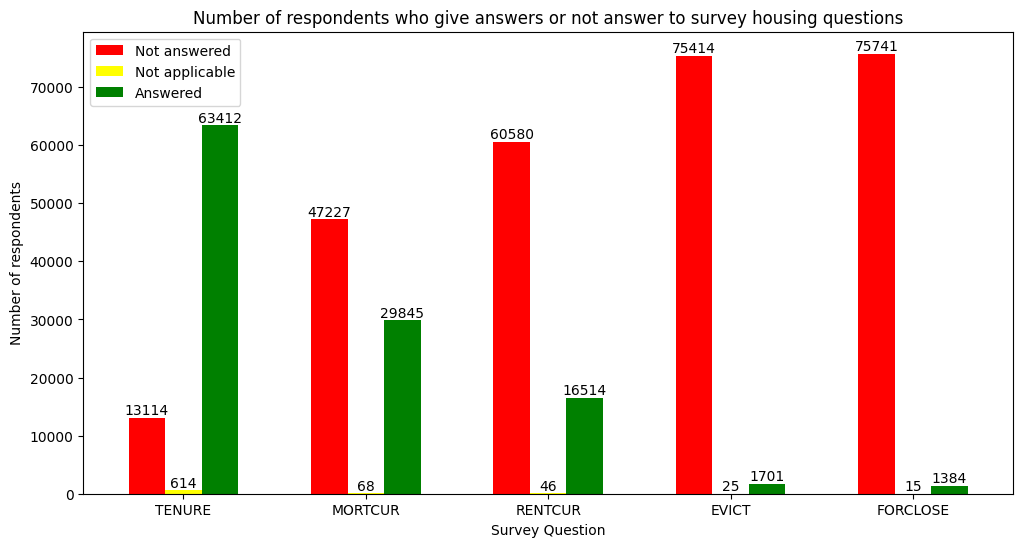

In [57]:
HPS_df_questions = HPS_df[["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]]

fig, ax = plt.subplots(figsize=(12, 6))
plot_data = pd.DataFrame({
    "Not answered": HPS_df_questions.isna().sum(),
    "Not applicable": (HPS_df_questions == -99).sum(),
    "Answered": ((HPS_df_questions != -99) & (HPS_df_questions != -88)).sum()
})
bars = plot_data.plot(kind="bar", stacked=False, ax=ax, color=["red", "yellow", "green"], width=0.6)
ax.set_xlabel("Survey Question")
ax.set_ylabel("Number of respondents")
ax.set_title("Number of respondents who give answers or not answer to survey housing questions")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')
    
plt.show()

### Distribution of answer to whether the house or apartment is owned or rented

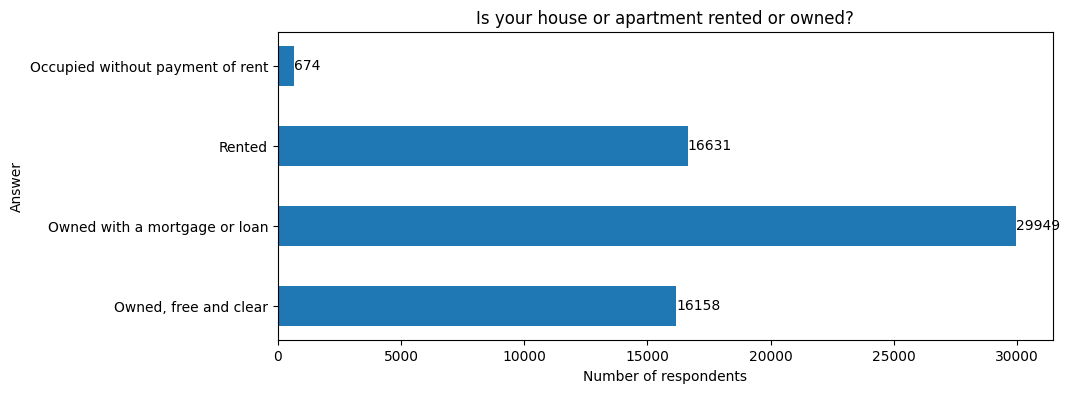

In [58]:
tenure_answer_count = value_counts_df["TENURE"].iloc[[1, 2, 3, 4]]
tenure_labels = {1: "Owned, free and clear", 2: "Owned with a mortgage or loan", 3: "Rented", 4: "Occupied without payment of rent"}

plt.figure(figsize=(10, 4))
plt.barh(tenure_answer_count.index.map(tenure_labels), tenure_answer_count, height=0.5)

for index, value in enumerate(tenure_answer_count):
    plt.text(value, index, str(value), va='center')

plt.xlabel("Number of respondents")
plt.ylabel("Answer")
plt.title("Is your house or apartment rented or owned?")

plt.show()

### Distribution of answer to whether the mortgage or rent is paid on time
Take into account only respondents who answered that they own the house with mortgage to `TENURE`.

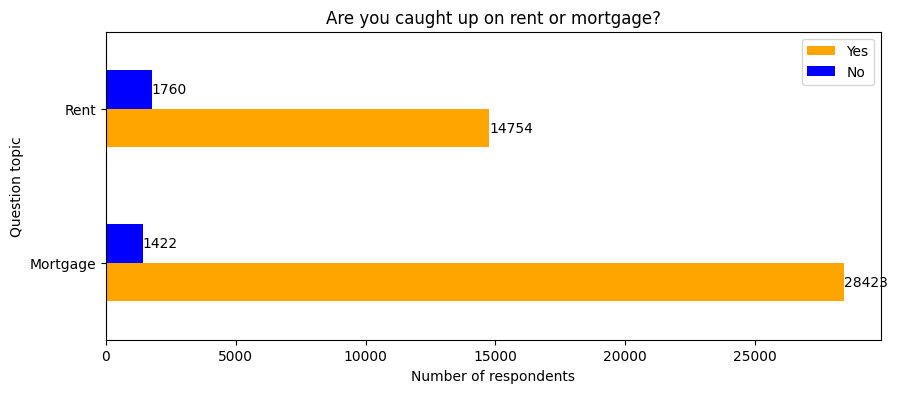

In [59]:
payment_answer_count = value_counts_df[["MORTCUR", "RENTCUR"]].iloc[[1, 2]].T.rename(index={"MORTCUR" : "Mortgage", "RENTCUR": "Rent"})

fig, ax = plt.subplots(figsize=(10, 4))
payment_answer_count.plot(kind="barh", stacked=False, ax=ax, color=['orange', 'blue'], width=0.5)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel("Number of respondents")
plt.xticks(rotation=0)
plt.ylabel("Question topic")
plt.title("Are you caught up on rent or mortgage?")
plt.legend(["Yes", "No"])

plt.show()

### Distribution of likeliness of having to move due to eviction or forclosure
Take into account only respondents who are ot caught up on their mortgage or rent.

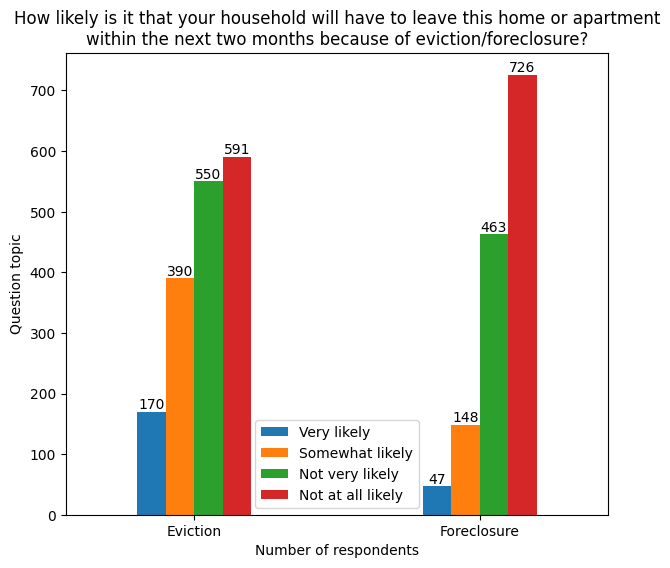

In [60]:
move_answer_count = value_counts_df[["EVICT", "FORCLOSE"]].iloc[[1, 2, 3, 4]].T.rename(index={"EVICT" : "Eviction", "FORCLOSE": "Foreclosure"})

fig, ax = plt.subplots(figsize=(7, 6))
move_answer_count.plot(kind="bar", stacked=False, ax=ax, width=0.4)

for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.xlabel("Number of respondents")
plt.xticks(rotation=0)
plt.ylabel("Question topic")
plt.title("How likely is it that your household will have to leave this home or apartment\nwithin the next two months because of eviction/foreclosure?")
plt.legend(["Very likely", "Somewhat likely", "Not very likely", "Not at all likely"])

plt.show()

# 3. Housing Situation Over Time

`count_by_year_df` shows the count of respondents who give certain answers to the survey questioons within each year. We will use this dataframe to show how the living condition has changed over the year 2021 to 2023.

In [61]:
columns_to_count = ["TENURE", "MORTCUR", "RENTCUR", "EVICT", "FORCLOSE"]
counts_by_column = {}

# Loop through each column to apply value_counts per group
for col in columns_to_count:
    counts_by_column[col] = (
        HPS_df.groupby("YEAR_COLLECTED")[col]
        .apply(lambda x: x.value_counts())
        .rename_axis(["YEAR_COLLECTED", "ANSWER"])
    )

# Concatenate counts into a single DataFrame, aligning on YEAR_COLLECTED and ANSWER levels
count_by_year_df = pd.concat(counts_by_column, axis=1)
count_by_year_df = count_by_year_df.drop(index=-99, level="ANSWER")
count_by_year_df

TENURE  MORTCUR  RENTCUR  EVICT  FORCLOSE
YEAR_COLLECTED ANSWER                                           
2021           2        14829      816      772    176        76
               1         8351    13955     6317     70        21
               3         7113     <NA>     <NA>    260       278
               4          319     <NA>     <NA>    242       423
2022           2         8146      342      529    118        43
               3         4949     <NA>     <NA>    154       104
               1         4457     7781     4366     55        14
               4          171     <NA>     <NA>    185       168
2023           2         6974      264      459     96        29
               3         4569     <NA>     <NA>    136        81
               1         3350     6687     4071     45        12
               4          184     <NA>     <NA>    164       135

`percentage_by_year` dataframe shows the percentage of each answer to housing questions over the year.

In [62]:
percentage_by_year_df = count_by_year_df.groupby("YEAR_COLLECTED", group_keys=False).apply(lambda x: (x / x.sum()) * 100)
percentage_by_year_df

TENURE    MORTCUR    RENTCUR      EVICT   FORCLOSE
YEAR_COLLECTED ANSWER                                                       
2021           2       48.441788   5.524338  10.890111  23.529412    9.52381
               1       27.280152  94.475662  89.109889   9.358289   2.631579
               3       23.235986       <NA>       <NA>  34.759358  34.837093
               4        1.042075       <NA>       <NA>  32.352941  53.007519
2022           2       45.962873   4.210267  10.806946  23.046875  13.069909
               3       27.924166       <NA>       <NA>  30.078125  31.610942
               1       25.148113  95.789733  89.193054  10.742188   4.255319
               4        0.964848       <NA>       <NA>  36.132812   51.06383
2023           2       46.255886   3.798015   10.13245  21.768707  11.284047
               3       30.304437       <NA>       <NA>  30.839002   31.51751
               1       22.219274  96.201985   89.86755  10.204082   4.669261
               4        1.220402       <NA>       <NA>  37.188209  52.529183

### 3.1 Housing Ownership Trend
The trend for owning the house, whether free and clear or with mortgage, has been declining in the past 2 years, while the number of responses saying that they rent their current housing has continually been increased.

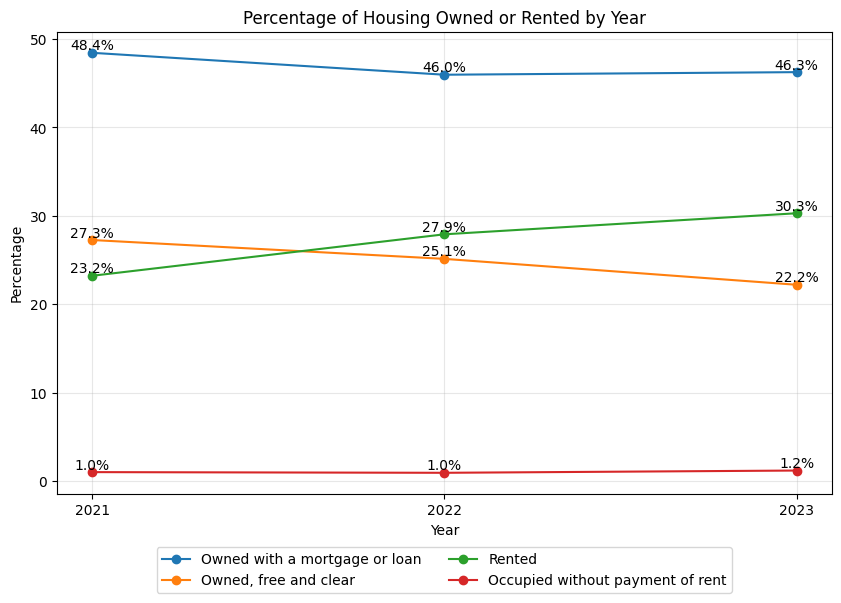

In [63]:
tenure_percentage_df = percentage_by_year_df[["TENURE"]].unstack(level='ANSWER')
tenure_percentage_df.columns = tenure_percentage_df.columns.droplevel(0)
tenure_labels = {1: "Owned, free and clear", 2: "Owned with a mortgage or loan", 3: "Rented", 4: "Occupied without payment of rent"}
tenure_percentage_df.columns = [tenure_labels[label] for label in tenure_percentage_df.columns]

fig, ax = plt.subplots(figsize=(10, 6))

for col in tenure_percentage_df.columns:
    ax.plot(tenure_percentage_df.index, tenure_percentage_df[col], marker='o', label=col)

for year in tenure_percentage_df.index:
    for answer in tenure_percentage_df.columns:
        percentage = tenure_percentage_df.loc[year, answer]
        ax.text(year, percentage, f"{percentage:.1f}%", ha="center", va="bottom")

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Housing Owned or Rented by Year')
plt.xticks(ticks=tenure_percentage_df.index, labels=tenure_percentage_df.index)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()

### 3.2 Housing Payment Trend

There are not much change in terms of whether a household are able to pay rent or mortgage on time. The percentage of respondents who are caught up on their payment increase by 1.7% from 2021 to 2023.

It is important to note, however, that more than 50% of the respondents whom this question is applicable to didn't give an answer, so it may be the case that those who didn't pay their rent or mortgage on time are less likely to answer.

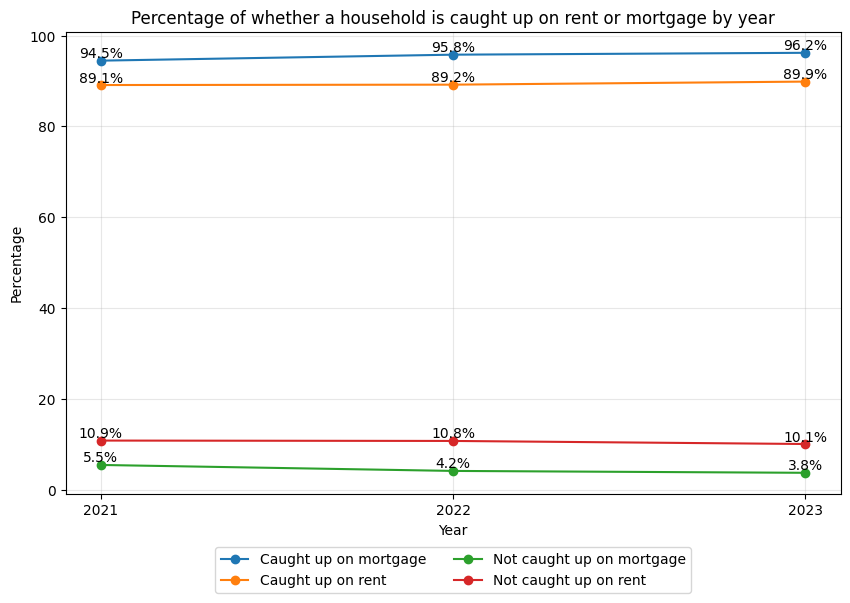

In [64]:
payment_percentage_df = percentage_by_year_df[["MORTCUR", "RENTCUR"]].unstack(level='ANSWER')
mortcur_labels = {1: "Caught up on mortgage", 2: "Not caught up on mortgage"}
rentcur_labels = {1: "Caught up on rent", 2: "Not caught up on rent"}

fig, ax = plt.subplots(figsize=(10, 6))
for answer in [1, 2]:
    ax.plot(payment_percentage_df.index, payment_percentage_df['MORTCUR', answer], marker='o', label=mortcur_labels[answer])
    ax.plot(payment_percentage_df.index, payment_percentage_df['RENTCUR', answer], marker='o', label=rentcur_labels[answer])

for year in payment_percentage_df.index:
    for answer in [1, 2]:
        if pd.notna(payment_percentage_df['MORTCUR', answer].loc[year]):
            ax.text(year, payment_percentage_df['MORTCUR', answer].loc[year], f"{payment_percentage_df['MORTCUR', answer].loc[year]:.1f}%", 
                    ha="center", va="bottom")
        if pd.notna(payment_percentage_df['RENTCUR', answer].loc[year]):
            ax.text(year, payment_percentage_df['RENTCUR', answer].loc[year], f"{payment_percentage_df['RENTCUR', answer].loc[year]:.1f}%", 
                    ha="center", va="bottom")

plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of whether a household is caught up on rent or mortgage by year')
ax.set_xticks(ticks=tenure_percentage_df.index, labels=tenure_percentage_df.index)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)

plt.show()

### 3.3 Eviction and Foreclosure Trend
There is a notable changes in how respondents who are not caught up on rent perceived the likelihood of having to move out of their housing due to eviction. The proportion of respondents who answers that being evicted is "not at all likely" despite being behind on rent increases is by 4% from 2021 to 2022, corresponding with the 4% decrease in the answer that being evicted is "not very likely."

The percentage of respondents who thinks that the likelihood of having to move out due to foreclosure increase 1.7% from 2021 to 2022 and continue to gradually increase through 2023.

Please note that the majority of respondents to whom this question is application did not provide an answer. Therefore, this percentage represents a very small proportion of respondents who answered.

In [65]:
percentage_by_year_df

TENURE    MORTCUR    RENTCUR      EVICT   FORCLOSE
YEAR_COLLECTED ANSWER                                                       
2021           2       48.441788   5.524338  10.890111  23.529412    9.52381
               1       27.280152  94.475662  89.109889   9.358289   2.631579
               3       23.235986       <NA>       <NA>  34.759358  34.837093
               4        1.042075       <NA>       <NA>  32.352941  53.007519
2022           2       45.962873   4.210267  10.806946  23.046875  13.069909
               3       27.924166       <NA>       <NA>  30.078125  31.610942
               1       25.148113  95.789733  89.193054  10.742188   4.255319
               4        0.964848       <NA>       <NA>  36.132812   51.06383
2023           2       46.255886   3.798015   10.13245  21.768707  11.284047
               3       30.304437       <NA>       <NA>  30.839002   31.51751
               1       22.219274  96.201985   89.86755  10.204082   4.669261
               4        1.220402       <NA>       <NA>  37.188209  52.529183

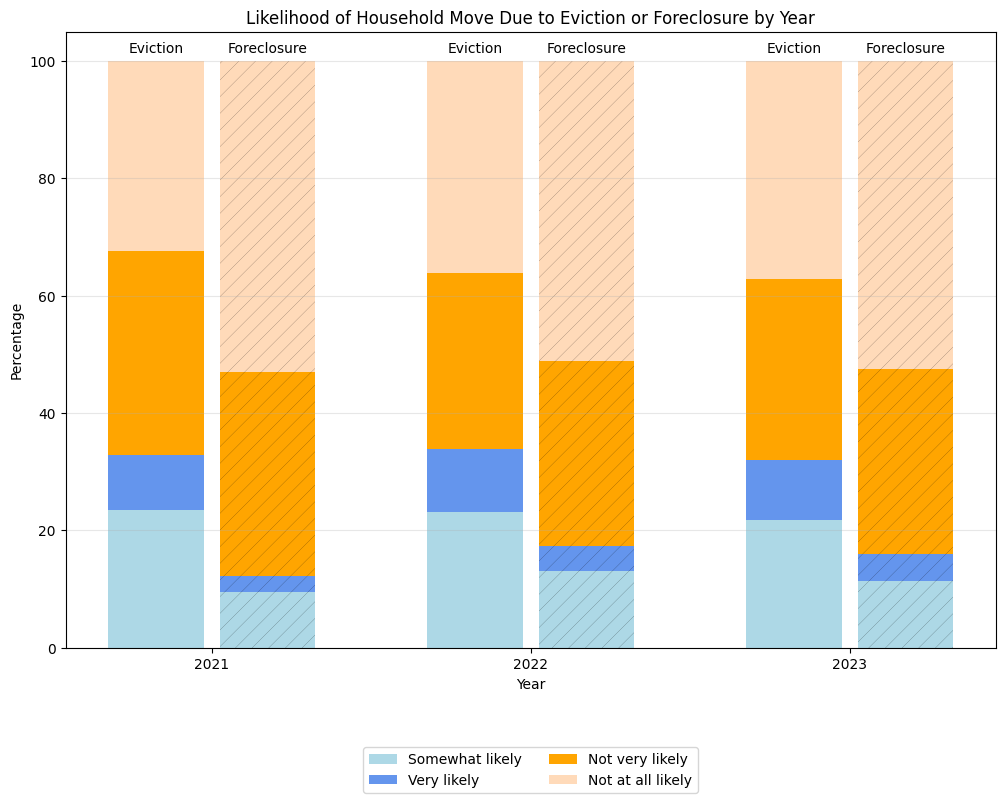

In [67]:
# Change the thickness of hatch lines
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.1

move_percentage_df = percentage_by_year_df[["EVICT", "FORCLOSE"]].unstack(level='ANSWER')
move_colors = {1: "cornflowerblue", 2: "lightblue", 3: "orange", 4: "peachpuff"}
move_labels = {1: "Very likely", 2: "Somewhat likely", 3: "Not very likely", 4: "Not at all likely"}

fig, ax = plt.subplots(figsize=(12, 8))

# Define x-axis positions for each year, with spacing for eviction and foreclosure bars
years = move_percentage_df.index
x = np.arange(len(years))
bar_width = 0.35
spacing = 0.05

# Initialize the bottom positions for stacked bars
evict_bottom = np.zeros(len(x))
foreclose_bottom = np.zeros(len(x))

# Track labels for the legend to ensure they only appear once
legend_labels = set()

# Loop through each answer category to stack the bars
for answer in move_percentage_df["EVICT"].columns:
    evict_height = move_percentage_df["EVICT", answer]
    foreclose_height = move_percentage_df["FORCLOSE", answer]
    
    # Add the likelihood label to the legend only once for each answer level
    likelihood_label = move_labels[answer]
    label = likelihood_label if likelihood_label not in legend_labels else None
    legend_labels.add(likelihood_label)

    ax.bar(x - bar_width / 2, evict_height, bottom=evict_bottom, color=move_colors[answer], label=label, width=0.3)
    evict_bottom += evict_height
    
    ax.bar(x + bar_width / 2, foreclose_height, bottom=foreclose_bottom, color=move_colors[answer], hatch='//', label=None, width=0.3)
    foreclose_bottom += foreclose_height


# Adding the "Eviction" and "Foreclosure" labels at the top of each bar
for i, year in enumerate(years):
    ax.text(x[i] - (0.3 + spacing) / 2, 101, "Eviction", ha="center", va="bottom")
    ax.text(x[i] + (0.3 + spacing) / 2, 101, "Foreclosure", ha="center", va="bottom")


plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Likelihood of Household Move Due to Eviction or Foreclosure by Year')

ax.set_xticks(x)
ax.set_xticklabels(years)

plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15), ncol=2)
plt.grid(axis="y", alpha=0.3)
plt.show()

# 4. Conclusion

- MA residents re turning to renting rather than owning their housings.
- There is a slight increase in the number of residents who are caugt up on their rent or mortgage payment.
- MA residents who are behind on mortgage payment feel that the chance of having to move out of their housing due to foreclosure is increasing, while residents who are behind on rent feels that they are less likely to be evicted.